In [1]:
import pandas as pd
import networkx as nx

# read data from csv file
df = pd.read_csv('Iron_dealers_data.csv')

# create directed multigraph
G = nx.MultiDiGraph()

# add edges to graph with labels
for index, row in df.iterrows():
    G.add_edge(row['Seller ID'], row['Buyer ID'],weight=row['Value'])

# print graph information
print(nx.info(G))

MultiDiGraph with 799 nodes and 130535 edges


/tmp/ipykernel_1071633/2310167633.py:15: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [2]:
H = nx.Graph()
for (u,v) in G.edges():

    count_2cycles = sum(1 for w in G.neighbors(u) if w in G.neighbors(v))
    
    # Count the number of cycles of length 3 containing nodes u and v
        
    count_3cycles = sum(1 for w in G.neighbors(u) if w != v and v in G.neighbors(w))
    
    # Compute the weight of the edge as the sum of counts
    weight = count_2cycles + count_3cycles
    
    # Add the weighted edge to the new graph
    H.add_edge(u, v, weight=weight)
    
print(nx.info(H))

Graph with 799 nodes and 5040 edges


/tmp/ipykernel_1071633/2757607679.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(H))


In [3]:
sm=0
for u,v,w in H.edges(data=True):
    print(u,"---,",w,",---",v)
    sm+=w['weight']
    
print(sm)

1309.0 ---, {'weight': 15} ,--- 1011.0
1309.0 ---, {'weight': 9} ,--- 1003.0
1309.0 ---, {'weight': 26} ,--- 1004.0
1309.0 ---, {'weight': 26} ,--- 1098.0
1309.0 ---, {'weight': 12} ,--- 1060.0
1309.0 ---, {'weight': 43} ,--- 1079.0
1309.0 ---, {'weight': 38} ,--- 1105.0
1309.0 ---, {'weight': 8} ,--- 1014.0
1309.0 ---, {'weight': 16} ,--- 1020.0
1309.0 ---, {'weight': 41} ,--- 1016.0
1309.0 ---, {'weight': 23} ,--- 1076.0
1309.0 ---, {'weight': 19} ,--- 1243.0
1309.0 ---, {'weight': 35} ,--- 1007.0
1309.0 ---, {'weight': 31} ,--- 1108.0
1309.0 ---, {'weight': 2} ,--- 1175.0
1309.0 ---, {'weight': 6} ,--- 1230.0
1309.0 ---, {'weight': 4} ,--- 1236.0
1309.0 ---, {'weight': 39} ,--- 1138.0
1309.0 ---, {'weight': 21} ,--- 1075.0
1309.0 ---, {'weight': 1} ,--- 1121.0
1309.0 ---, {'weight': 18} ,--- 1189.0
1309.0 ---, {'weight': 24} ,--- 1040.0
1309.0 ---, {'weight': 4} ,--- 1180.0
1309.0 ---, {'weight': 4} ,--- 1218.0
1309.0 ---, {'weight': 7} ,--- 1370.0
1309.0 ---, {'weight': 13} ,--- 10

In [4]:
from node2vec import Node2Vec

# Generate the node embeddings using node2vec
node2vec = Node2Vec(H, dimensions=64, walk_length=40, num_walks=400, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get the embeddings for each node in the graph
node_embeddings = {node: model.wv[str(node)] for node in H.nodes()}

print(node_embeddings)

Computing transition probabilities:   0%|          | 0/799 [00:00<?, ?it/s]

/home/deepak/anaconda3/lib/python3.9/site-packages/node2vec/node2vec.py:143: RuntimeWarning: invalid value encountered in true_divide
  d_graph[source][self.FIRST_TRAVEL_KEY] = first_travel_weights / first_travel_weights.sum()
Generating walks (CPU: 4): 100%|██████████| 100/100 [00:30<00:00,  3.23it/s]


{1309.0: array([ 0.12326238, -0.10707612, -0.11115724,  0.12189555,  0.15664238,
       -0.13939244, -0.10029007,  0.2280066 , -0.14502293,  0.11515655,
        0.03216095, -0.09870331,  0.02331943, -0.18998052, -0.18514241,
        0.20666115, -0.26031   , -0.17952965,  0.06943418,  0.23313044,
        0.35861972, -0.05629696,  0.09249497, -0.1426185 ,  0.40369543,
        0.10843848, -0.090605  , -0.1753664 ,  0.25345722,  0.0811579 ,
        0.16882856,  0.4515994 , -0.00946812,  0.12380708, -0.09450992,
       -0.29369202, -0.18371548, -0.02347247,  0.19879943, -0.0460398 ,
       -0.06588764,  0.13915929, -0.06954083, -0.23682821,  0.04395318,
        0.09780211, -0.06605123,  0.00188085, -0.09558769, -0.07738248,
        0.06819917,  0.07538568,  0.21972553,  0.05660157,  0.257671  ,
        0.08408047, -0.0202099 , -0.08274318, -0.04207553,  0.34785825,
       -0.17106953, -0.20660302,  0.15306076,  0.16834097], dtype=float32), 1011.0: array([ 0.15480328, -0.30187336, -0.0784651

/home/deepak/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deepak/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


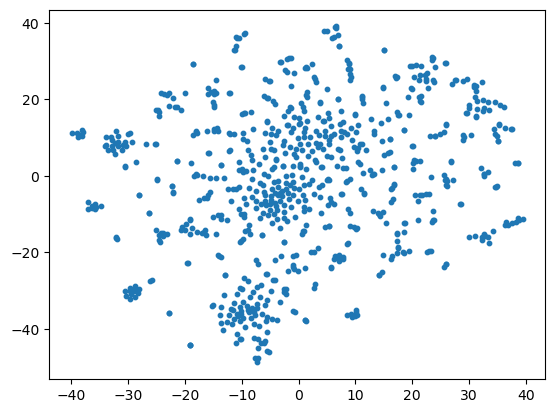

In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have a dictionary of embeddings with keys as node IDs and values as vectors
#embedding_dict = {'node1': np.random.rand(128), 'node2': np.random.rand(128)}

# Extract a subset of embeddings for visualization
num_samples = 799
embedding_matrix = np.array(list(node_embeddings.values()))
sample_indices = np.random.choice(embedding_matrix.shape[0], num_samples, replace=False)
sample_embeddings = embedding_matrix[sample_indices]

# Apply t-SNE to reduce the dimensionality of the embeddings
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_embeddings = tsne.fit_transform(sample_embeddings)

# Visualize the embeddings
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], s=10)
plt.show()

In [6]:
node_features = list(node_embeddings.values())

In [7]:
print(node_features)

[array([ 0.12326238, -0.10707612, -0.11115724,  0.12189555,  0.15664238,
       -0.13939244, -0.10029007,  0.2280066 , -0.14502293,  0.11515655,
        0.03216095, -0.09870331,  0.02331943, -0.18998052, -0.18514241,
        0.20666115, -0.26031   , -0.17952965,  0.06943418,  0.23313044,
        0.35861972, -0.05629696,  0.09249497, -0.1426185 ,  0.40369543,
        0.10843848, -0.090605  , -0.1753664 ,  0.25345722,  0.0811579 ,
        0.16882856,  0.4515994 , -0.00946812,  0.12380708, -0.09450992,
       -0.29369202, -0.18371548, -0.02347247,  0.19879943, -0.0460398 ,
       -0.06588764,  0.13915929, -0.06954083, -0.23682821,  0.04395318,
        0.09780211, -0.06605123,  0.00188085, -0.09558769, -0.07738248,
        0.06819917,  0.07538568,  0.21972553,  0.05660157,  0.257671  ,
        0.08408047, -0.0202099 , -0.08274318, -0.04207553,  0.34785825,
       -0.17106953, -0.20660302,  0.15306076,  0.16834097], dtype=float32), array([ 0.15480328, -0.30187336, -0.07846514,  0.13795541, 

In [8]:
node_features = np.array(node_features)

In [9]:
print(node_features)

[[ 0.12326238 -0.10707612 -0.11115724 ... -0.20660302  0.15306076
   0.16834097]
 [ 0.15480328 -0.30187336 -0.07846514 ... -0.09264434  0.01985553
   0.0275388 ]
 [ 0.19909896  0.04187774 -0.091369   ... -0.06774499  0.11525542
   0.3193625 ]
 ...
 [-0.3491066  -0.39100677 -0.15456752 ... -0.3931119  -0.00267567
   0.32154906]
 [-0.1185955  -0.328909    0.59152114 ... -0.71115863 -0.49274552
   0.1126332 ]
 [-0.18201645  0.05240539 -0.18410161 ... -0.23772238 -0.5165358
  -0.02540754]]


In [10]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN algorithm to find clusters of nodes that are densely connected together
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine').fit(node_features)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Print the clusters of nodes
for cluster_id in set(labels):
    cluster_nodes = [node for i, node in enumerate(H.nodes) if labels[i] == cluster_id]
    print("Cluster", cluster_id, ":", cluster_nodes)

Cluster 0 : [1309.0, 1011.0, 1003.0, 1004.0, 1098.0, 1060.0, 1079.0, 1105.0, 1014.0, 1020.0, 1016.0, 1076.0, 1243.0, 1007.0, 1108.0, 1175.0, 1230.0, 1236.0, 1138.0, 1075.0, 1121.0, 1189.0, 1040.0, 1180.0, 1218.0, 1370.0, 1027.0, 1101.0, 1068.0, 1184.0, 1168.0, 1172.0, 1201.0, 1034.0, 1196.0, 1208.0, 1263.0, 1327.0, 1349.0, 1458.0, 1473.0, 1127.0, 1136.0, 1222.0, 1246.0, 1323.0, 1405.0, 1264.0, 1493.0, 1501.0, 1373.0, 1443.0, 1324.0, 1364.0, 1369.0, 1463.0, 1523.0, 1311.0, 1328.0, 1377.0, 1220.0, 1310.0, 1449.0, 1584.0, 1194.0, 1199.0, 1214.0, 1356.0, 1037.0, 1238.0, 1676.0, 1788.0, 1845.0, 1318.0, 1352.0, 1375.0, 1080.0, 1023.0, 1278.0, 1247.0, 1064.0, 1070.0, 1508.0, 1517.0, 1128.0, 1265.0, 1259.0, 1073.0, 1030.0, 1049.0, 1039.0, 1099.0, 1231.0, 1149.0, 1224.0, 1398.0, 1471.0, 1483.0, 1348.0, 1376.0, 1215.0, 1569.0, 1813.0, 1568.0, 1010.0, 1147.0, 1112.0, 1001.0, 1026.0, 1315.0, 1143.0, 1574.0, 1314.0, 1406.0, 1282.0, 1438.0, 1565.0, 1502.0, 1540.0, 1544.0, 1580.0, 1285.0, 1769.0, 178

/home/deepak/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/deepak/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


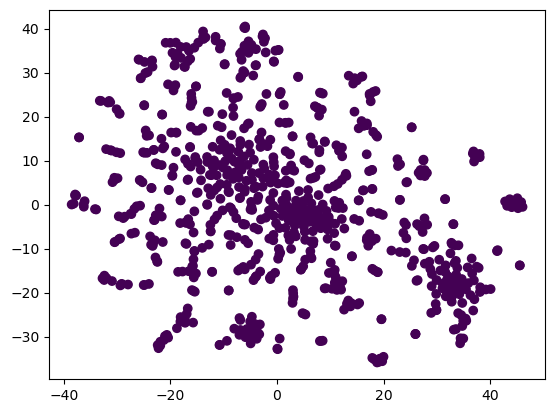

In [11]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert the dictionary of node embeddings into a matrix
node_embeddingsval = np.array(list(node_embeddings.values()))

# Use t-SNE to reduce the dimensionality of the embeddings to 2
tsne_embeddings = TSNE(n_components=2).fit_transform(node_embeddingsval)

# Get the clusters of each node
clusters = [labels[node] for node in range(len(node_embeddings.keys()))]

# Plot the reduced embeddings, colored by cluster
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=clusters)
plt.show()